# Introducing the sklearn models

The goal of this notebook is: 

1. Create a model using sklearn
    * Introduce the Decision Trees
2. Error analysis
    * Confusion matrix

Rescources:(http://www.r2d3.us/) 

In [41]:
import pandas as pd

housing = pd.read_csv('housing-classification-iter-0-2.csv')

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [10]:
housing.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

## Create train and test



How can you split the data between train and test?

In [44]:
from sklearn.model_selection import train_test_split
# create the train and the test using the data
X = housing.filter(['Fireplaces1'])
y = housing.filter(['Expensive'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

In [42]:
def price_range(Fireplaces):
    if Fireplaces > 1:
        return 1
    else:
        return 0

In [43]:
housing['Fireplaces1'] = [price_range(Fireplaces) for Fireplaces in housing['Fireplaces']]

In [45]:
X_train.sample(5)

,Fireplaces1
1358,0
1325,0
1192,0
906,0
246,0


## Preprocess the data

Is there any column with missing values on the train set?

In [46]:
housing.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
Fireplaces1       0
dtype: int64

In [47]:
# get_dummies from pandas
pd.get_dummies(X_train).sample(5)

,Fireplaces1
854,0
958,0
45,0
814,0
522,1


## Train your model

How can you train a decision tree for classification? 

This article on the [platform](https://platform.wbscodingschool.com/courses/data-science/11013/) will help you accomplish this task.

In [48]:
# import and fit our decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
X_train.columns

Index(['Fireplaces1'], dtype='object')

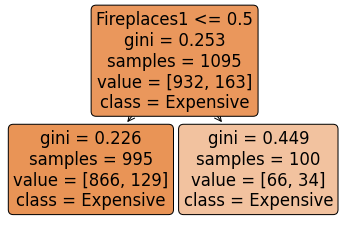

In [50]:
# visualise our model
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(
    tree, 
    filled = True, 
    rounded = True, 
    class_names = ['Expensive', 'Not Expensive'],
    feature_names=X_train.columns
);

## Apply your model

What is the accuracy you got on the train data?

In [51]:
# check the accuracy
from sklearn.metrics import accuracy_score

preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.8511415525114155

Is there any preprocessing you need to do to the test data before applying the model?

In [53]:
# OneHotEncoder on sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train)


OneHotEncoder(drop='first', sparse=False)

In [54]:
# 1st we need to transform our test set
X_test_enc = ohe.transform(X_test)
X_test_enc = pd.DataFrame(X_test, columns=ohe.get_feature_names_out())

In [55]:
# apply our transformer
X_train_enc = ohe.transform(X_train)
X_train_enc = pd.DataFrame(X_train_enc, columns=list(ohe.get_feature_names_out()))
X_train_enc.head()

,Fireplaces1_1
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


What is the accuracy of your model for the test data?

In [56]:
# import and fit our decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_enc, y_train)

DecisionTreeClassifier()

In [57]:
X_train_enc.columns

Index(['Fireplaces1_1'], dtype='object')

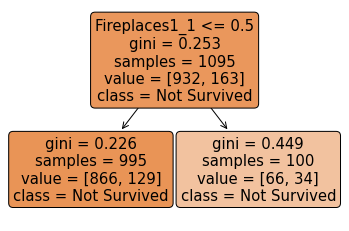

In [58]:
# visualise our model
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(
    tree, 
    filled = True, 
    rounded = True, 
    class_names = ['Not Survived', 'Survived'],
    feature_names=X_train_enc.columns
);

In [59]:
# 1st we need to transform our test set
X_test_enc = ohe.transform(X_test)
X_test_enc = pd.DataFrame(X_test_enc, columns=ohe.get_feature_names_out())

In [60]:
# 2nd let's use our model to predict our values 
preds = tree.predict(X_test_enc)
acc_3rd = accuracy_score(preds, y_test)
acc_3rd 

0.852054794520548

## Error analysis

To evaluate if a classification model is good or not, it is really useful to visualise its erros. A great way to do it is using a [`Confusion Matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html). Take a look at [platform](https://platform.wbscodingschool.com/courses/data-science/11319/) to understand more about it. 

What is the confusion matrix of our test data?

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


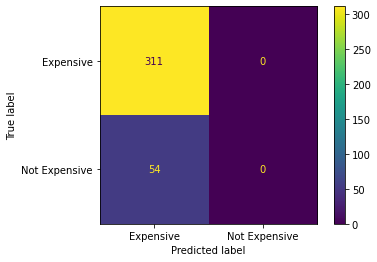

In [62]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, X_test_enc, y_test, display_labels=['Expensive','Not Expensive'])

**Dealing with the missing values**


The goal of this section is to learn how to deal with missing values with sklearn.

In [94]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/JoanClaverol/housing_data/main/housing-classification-iter-0-2.csv')

**Create train and test**


How can you split the data between train and test?

In [95]:
# train and test creation
from sklearn.model_selection import train_test_split
X = housing.drop(columns=['TotalBsmtSF','PoolArea','Expensive','LotFrontage','BedroomAbvGr'])
y = housing.filter(['Expensive'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Preprocess the data
Is there any column with missing values on the train data?

In [96]:
X_train.isna().sum()

LotArea        0
Fireplaces     0
GarageCars     0
WoodDeckSF     0
ScreenPorch    0
dtype: int64

In [97]:
X_train.dropna()

,LotArea,Fireplaces,GarageCars,WoodDeckSF,ScreenPorch
884,7150,0,1,0,0
641,7050,1,2,0,0
1357,12537,1,2,0,0
469,9291,0,2,144,0
222,11475,1,2,209,0
...,...,...,...,...,...
986,5310,0,1,394,0
133,6853,0,2,192,0
361,9144,0,1,0,0
1364,3180,0,2,0,0


In [98]:
X_test.isna().sum()

LotArea        0
Fireplaces     0
GarageCars     0
WoodDeckSF     0
ScreenPorch    0
dtype: int64

How can I impute missing values for a numeric column with sklearn?

To accomplish that question you will have to read about how to impute missing values for a numeric column using sklearn.

In [99]:
# import the missing values imputer from sklearn
from sklearn.impute import SimpleImputer

# define missing values imputer strategy
imp_num = SimpleImputer(strategy='median')

In [101]:
# define a list of numeric columns
num_col = ['LotArea','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch']
X_train[num_col].head(10)

,LotArea,Fireplaces,GarageCars,WoodDeckSF,ScreenPorch
884,7150,0,1,0,0
641,7050,1,2,0,0
1357,12537,1,2,0,0
469,9291,0,2,144,0
222,11475,1,2,209,0
512,9100,0,2,0,0
359,12011,1,2,208,374
9,7420,2,1,0,0
456,4571,0,3,0,0
616,7861,1,2,100,0


In [70]:
X_test.isna().sum()

LotArea         0
BedroomAbvGr    0
Fireplaces      0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

**Create your model**


How can you create a model using sklearn?

ATTENTION: be sure you are using the train data with no missing values.

In [84]:
# encode variables with the once hot encoder(not critical)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(
    drop='first',
    sparse=False
)
X_train_enc = enc.fit_transform(X_train[num_col])


# apply the encoder to train
X_train_enc = pd.DataFrame(
    X_train_enc, 
    columns=enc.get_feature_names_out(), 
    index=X_train.index
)

X_train = pd.concat([X_train[num_col], X_train_enc], axis=1, ignore_index=False)

In [72]:
X_train_enc = enc.transform(X_train[num_col])

# apply the encoder to test
X_test_enc = pd.DataFrame(
    X_test, 
    columns=enc.get_feature_names_out(), 
    index=X_test.index
)

X_test = pd.concat([X_test[num_col], X_test], axis=1, ignore_index=False)

**Apply your model**


What is the accuracy score for the train set?

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

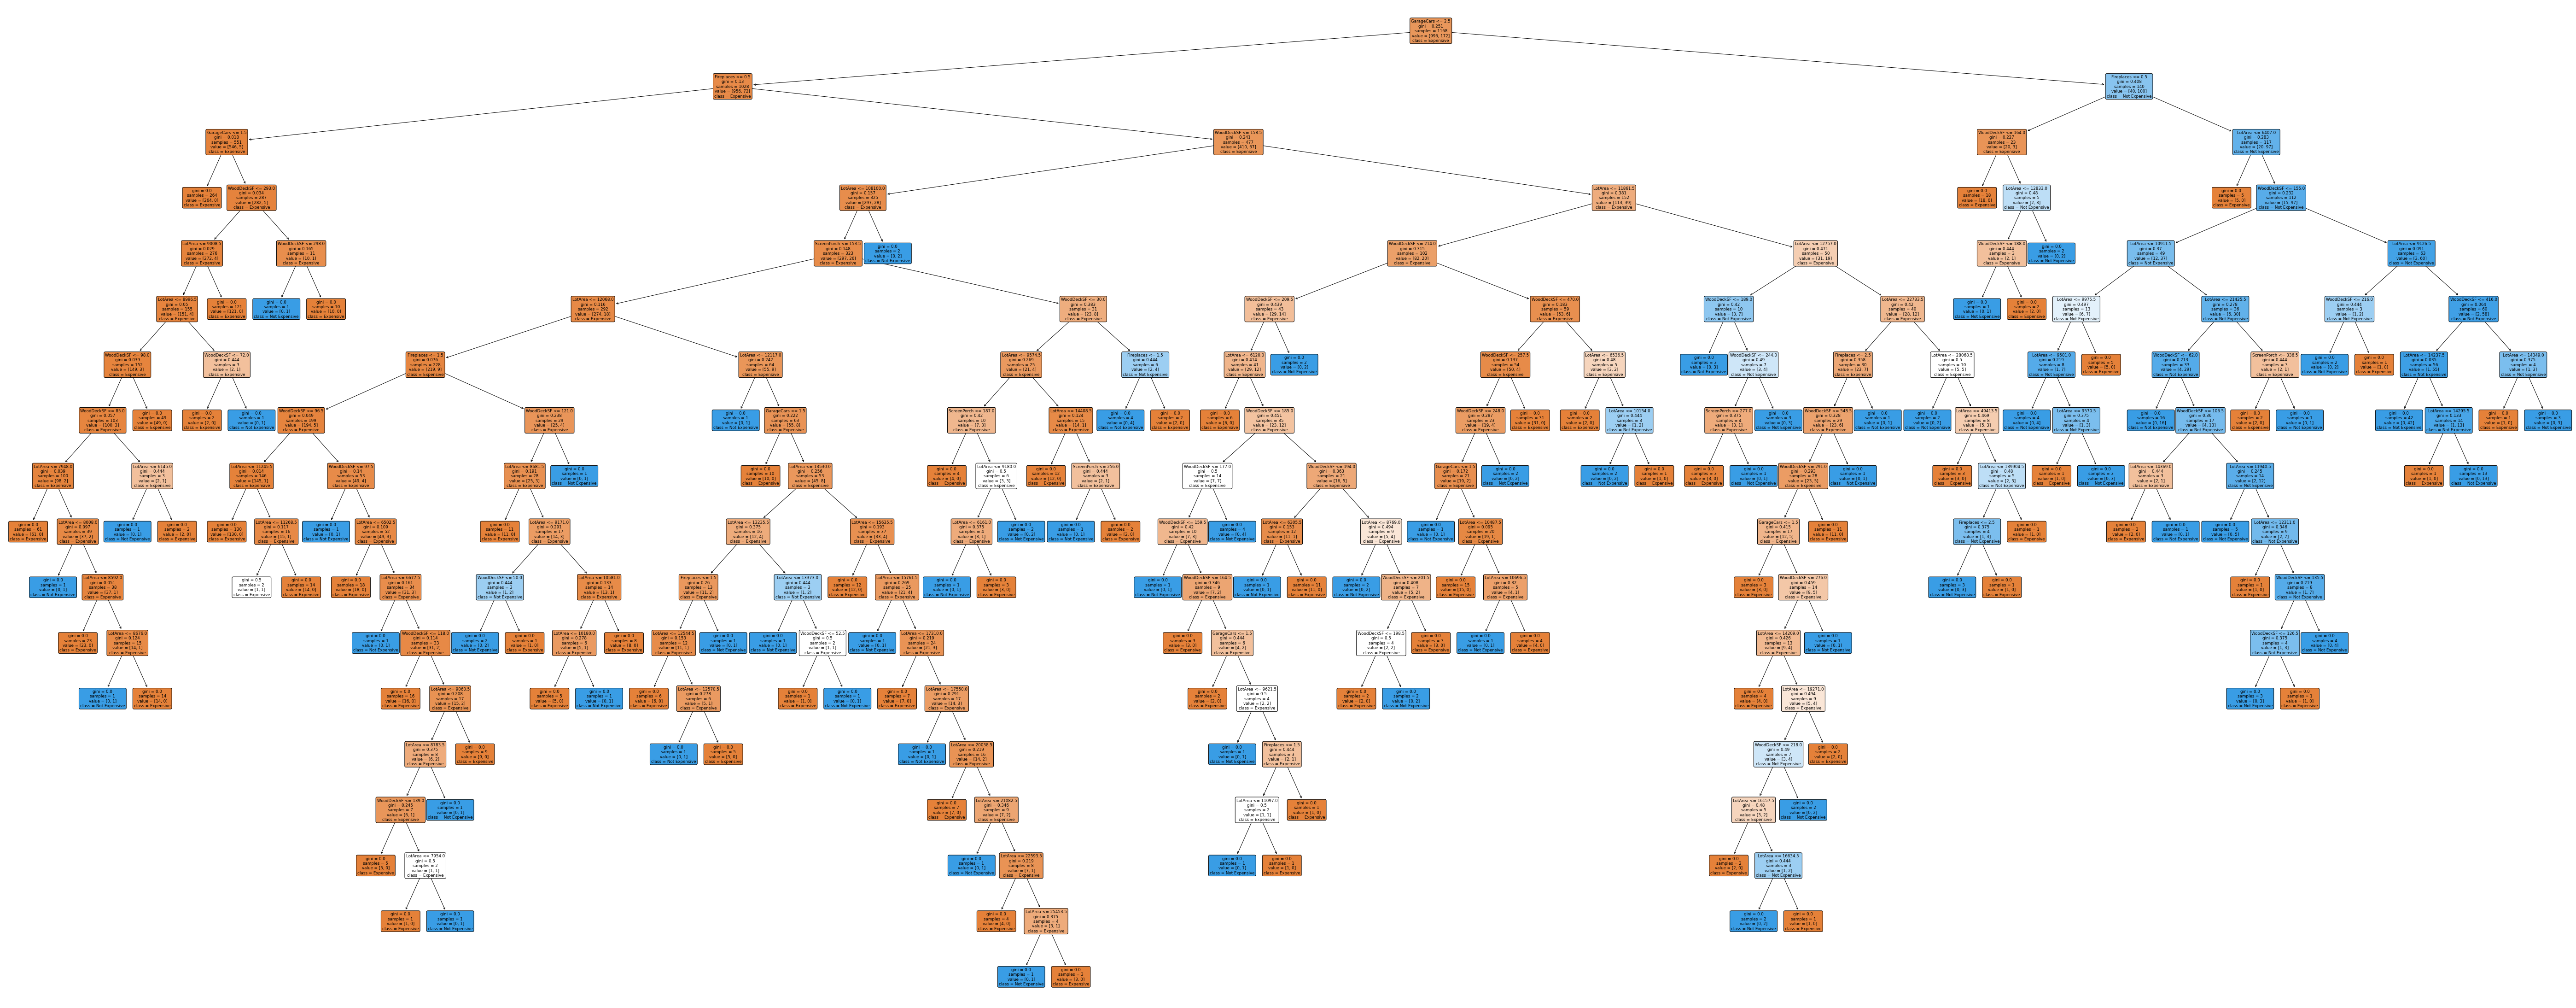

In [103]:
# plot our tree
plt.figure(figsize=(100, 40))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['Expensive', 'Not Expensive'], 
    feature_names=X_train.columns
    );

Test our model

In [104]:
# accuracy in train set
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.9991438356164384

In [105]:
# accuracy in test set
preds = tree.predict(X_test)
accuracy_score(preds, y_test)

0.8356164383561644

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


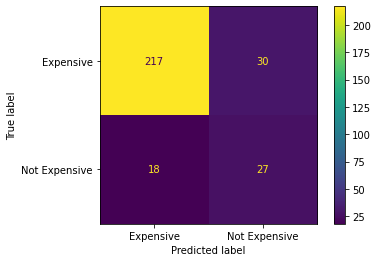

In [106]:
# plot confusion matrix
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Expensive', 'Not Expensive']);

In [107]:
# train a decision tree with maximum depth 3
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

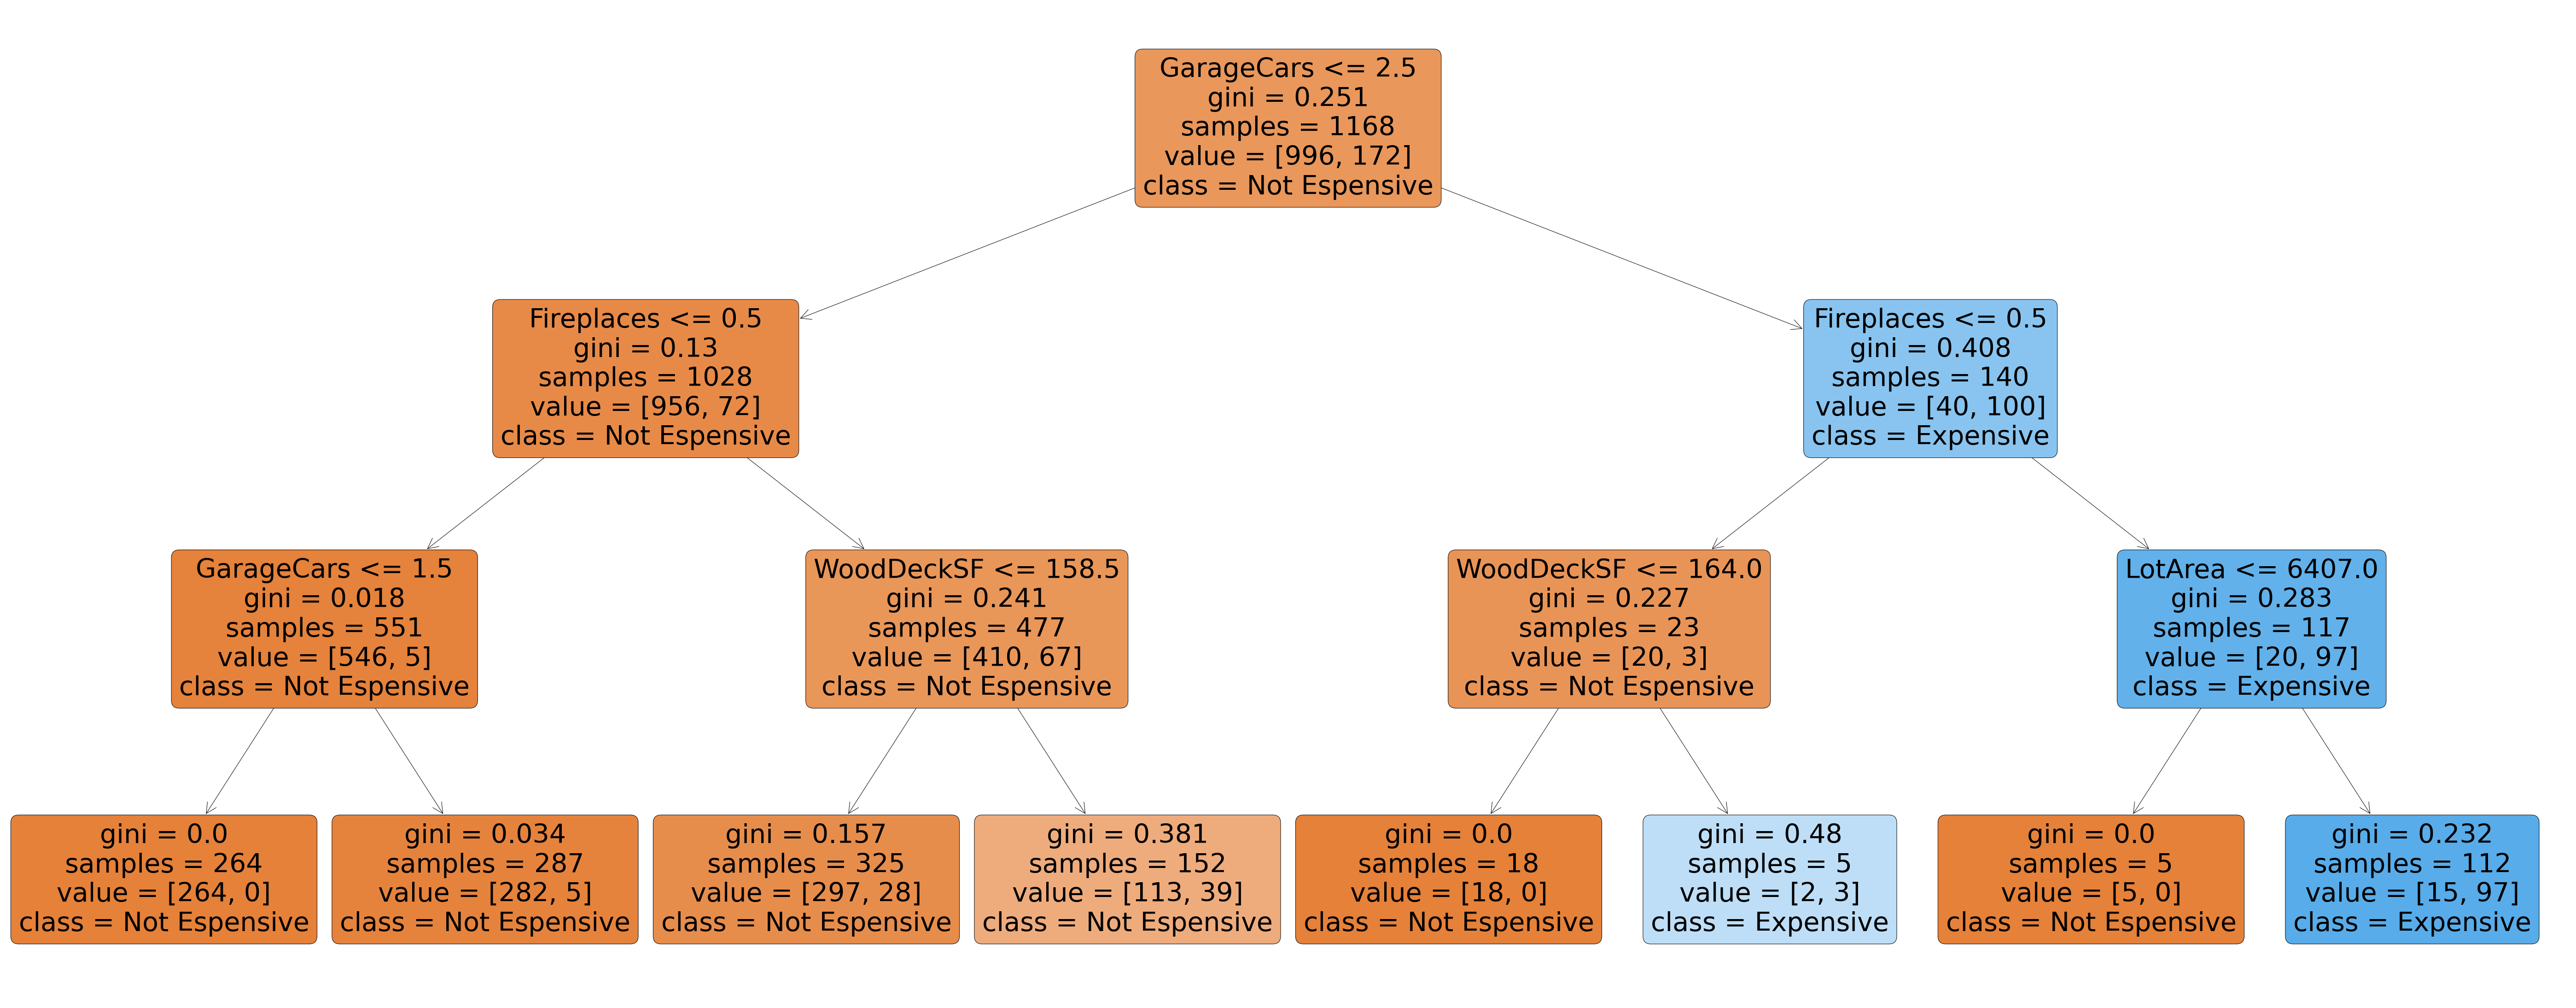

In [109]:
plt.figure(figsize=(100, 40))
plot_tree(
      tree,
      filled=True, 
      rounded=True, 
      class_names=['Not Espensive', 'Expensive'], 
      feature_names=X_train.columns
   );

In [110]:
# accuracy in train set
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.9238013698630136

In [111]:
# accuracy in test set
preds = tree.predict(X_test)
accuracy_score(preds, y_test)

0.9006849315068494

In [112]:
pd.DataFrame({
    'importance':tree.feature_importances_, 
    'columns':X_train.columns
}).sort_values(by='importance', ascending=False)

,importance,columns
2,0.701288,GarageCars
1,0.189009,Fireplaces
3,0.060514,WoodDeckSF
0,0.049189,LotArea
4,0.000000,ScreenPorch
